## Overfitting or not. That's the question

In [1]:
import pandas as pd
import numpy as np

import random

from sklearn import preprocessing
import statistics
import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt\


import os

In [2]:
outdir = "/Users/hn/Documents/01_research_data/Other_people/Ehsan/"
os.makedirs(outdir, exist_ok=True)

In [3]:
random.seed(10)
print(random.random())

0.5714025946899135


In [4]:
np.random.seed(10)
np.random.normal(loc=0.0, scale=1.0, size=10)

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021])

### First create `x` and then add random noise to each `x` to get `y`.

So, some random points around the $y=x$ line

In [5]:
np.random.seed(6)
vec_size = 10
x = np.random.normal(size=vec_size)
y = x + np.random.normal(loc=0, scale=1, size=vec_size)
# np. corrcoef (x, y)

In [6]:
x_y_line = np.arange(-4, 5)

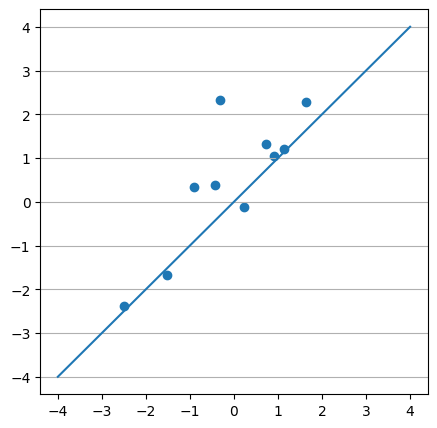

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False)
axes.grid(axis="y", which="both");
axes.plot(x_y_line, x_y_line, label = "$y=x$")

axes.scatter(x, y);

### add powers of `x` to the dataframe for polynomial regression

In [8]:
df = pd.DataFrame(columns=["y", "x"], data= np.column_stack((y, x)) )
for a in np.arange(2, 12):
    df["x" + str(a)] = x**a

df.head(2)

,y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,2.319497,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,0.000009,-0.000003
1,1.330826,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,0.042393,0.030905


In [9]:
df = sm.add_constant(df)
df.head(3)

,const,y,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1.0,2.319497,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,8.680279e-06,-2.706369e-06
1,1.0,1.330826,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,4.239344e-02,3.090498e-02
2,1.0,-0.118061,0.217821,0.047446,0.010335,0.002251,0.000490,0.000107,0.000023,0.000005,0.000001,2.404325e-07,5.237121e-08


In [10]:
# reorder columns!
a = list(df.columns)
a.remove("y")
df = df[['y'] + a]
df.head(3)

,y,const,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,2.319497,1.0,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,8.680279e-06,-2.706369e-06
1,1.330826,1.0,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,4.239344e-02,3.090498e-02
2,-0.118061,1.0,0.217821,0.047446,0.010335,0.002251,0.000490,0.000107,0.000023,0.000005,0.000001,2.404325e-07,5.237121e-08


In [11]:
# Everything has been random. 
# so, no need to "shuffle"
train_df = df.loc[0:7].copy()
test_df =  df.loc[8:].copy()

In [12]:
X_train = train_df.iloc[:, 1:9]
Y_train = train_df.iloc[:, 0]
X_train.head(2)

,const,x,x2,x3,x4,x5,x6,x7
0,1.0,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286
1,1.0,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423


In [13]:
import warnings
warnings.filterwarnings('ignore') 

model = sm.OLS(Y_train, X_train);
model_result = model.fit();
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 03 Aug 2025   Prob (F-statistic):                nan
Time:                        19:56:17   Log-Likelihood:                 219.49
No. Observations:                   8   AIC:                            -423.0
Df Residuals:                       0   BIC:                            -422.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3480        inf          0        nan         nan         nan
x             -4.6932        inf         -0        nan         nan         nan
x2            10.1656        inf          0        nan         nan         nan
x3            11.3308        inf          0        nan         nan         nan
x4           -17.7154        inf         -0        nan         nan         nan
x5            -8.5441        inf         -0        nan         nan         nan
x6             7.0447        inf          0        nan         nan         nan
x7             2.8976        inf          0        nan         nan         nan
==============================================================================
Omnibus:                       15.910   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.968
Skew:                          -1.791   Prob(JB):                       0.0506
Kurtosis:                       5.252   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X_test = test_df.iloc[:, 1:9]
Y_test = test_df.iloc[:, 0]

In [15]:
#### polynomial creation to show fitted model
x = np.linspace(start = np.floor(df["x"].min()), stop = np.ceil(df["x"].max()), num=100)
poly_df = pd.DataFrame(columns=["x"], data=x)
for a in np.arange(2, 12):
    poly_df["x" + str(a)] = x**a

poly_df = sm.add_constant(poly_df)
poly_df["y_pred"] = model_result.predict(poly_df[list(X_train.columns)])

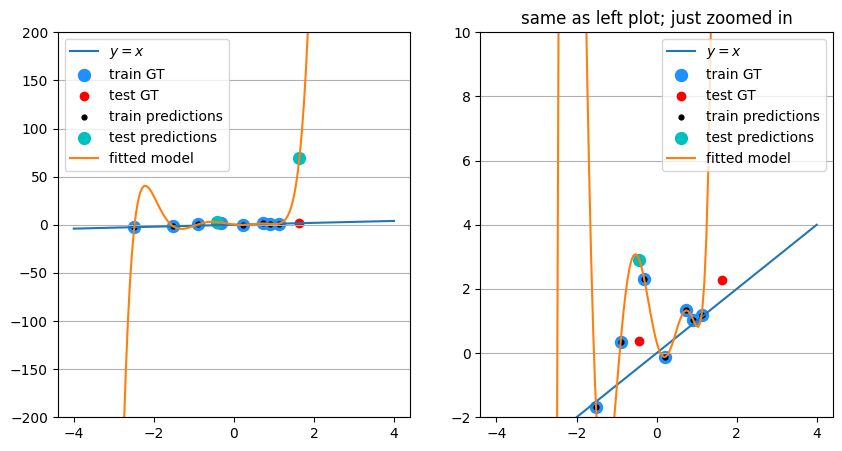

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
(ax1, ax2) = axes
ax1.grid(axis="y", which="both"); ax2.grid(axis="y", which="both")

ax1.plot(x_y_line, x_y_line, label = "$y=x$")
ax1.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "train GT", s=74);
ax1.scatter(test_df["x"],  test_df["y"], color="red", label = "test GT");

ax1.scatter(train_df["x"], model_result.predict(X_train), s = 12, color="k", label="train predictions")
ax1.scatter(test_df["x"], model_result.predict(X_test), s = 72, color="c", label="test predictions")
ax1.plot(poly_df["x"], poly_df["y_pred"], label="fitted model");
ax1.legend(loc="best");
ax1.set_ylim(-200, 200);
###################################

ax2.plot(x_y_line, x_y_line, label = "$y=x$")
ax2.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "train GT", s=74);
ax2.scatter(test_df["x"],  test_df["y"], color="red", label = "test GT");
ax2.scatter(train_df["x"], model_result.predict(X_train), s = 12, color="k", label="train predictions")
ax2.scatter(test_df["x"], model_result.predict(X_test), s = 72, color="c", label="test predictions")
ax2.plot(poly_df["x"], poly_df["y_pred"], label="fitted model");
ax2.title.set_text('same as left plot; just zoomed in')

ax2.legend(loc="best");
ax2.set_ylim(-2, 10);

In [17]:
from scipy.linalg import norm

train_error = norm(model_result.predict(X_train) - Y_train)
print (f"{train_error = }")
print ()


test_error = norm(model_result.predict(X_test) - Y_test)
print (f"{test_error = }")

train_error = 8.312761748826612e-13

test_error = 67.47322341713785


# Remove one outlier and see its effect on the model

In [18]:
Y_train_outlier = Y_train.copy()
Y_train_outlier[0] = 20
Y_train_outlier

0    20.000000
1     1.330826
2    -0.118061
3     0.338646
4    -2.375652
5     1.042403
6     1.203191
7    -1.669221
Name: y, dtype: float64

In [19]:
model_outlier = sm.OLS(Y_train_outlier, X_train);
model_result_outlier = model_outlier.fit();
y_pred_outlier = model_result_outlier.predict(poly_df[list(X_train.columns)])
# model_result_outlier.summary()

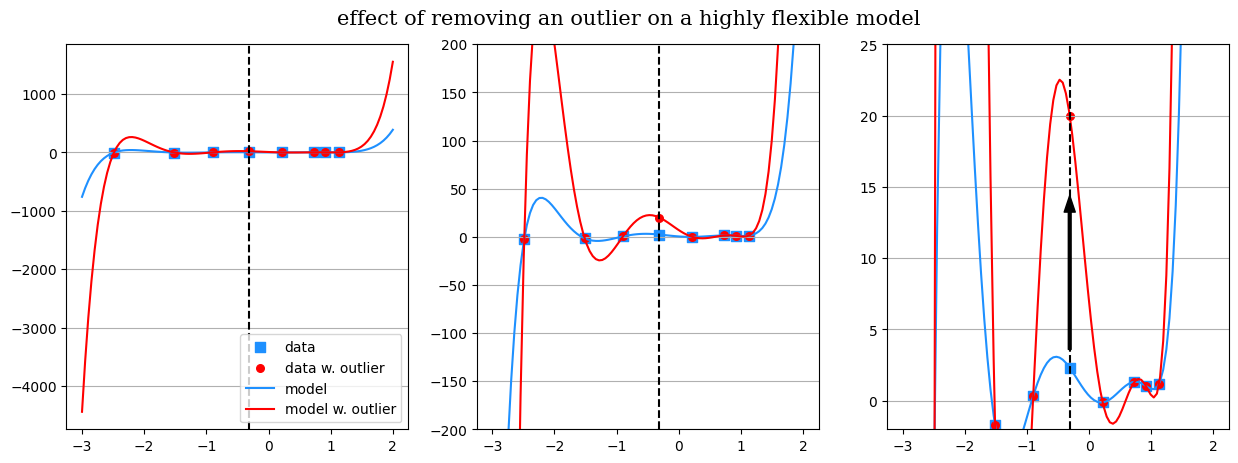

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
(ax0, ax1, ax2) = axes
ax0.grid(axis="y", which="both"); ax1.grid(axis="y", which="both"); ax2.grid(axis="y", which="both")

ax0.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "data", s=50, marker='s');
ax0.scatter(train_df["x"], Y_train_outlier, color="red", label = "data w. outlier", s=30);
ax0.plot(poly_df["x"], poly_df["y_pred"], color="dodgerblue", label="model");
ax0.plot(poly_df["x"], y_pred_outlier, color="red", label="model w. outlier");
ax0.legend(loc="best");
ax0.axvline(x=X_train['x'][0], color='k', linestyle='--')
##################################
##################################
##################################
ax1.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "data", s=50, marker='s');
ax1.scatter(train_df["x"], Y_train_outlier, color="red", label = "data w. outlier", s=30);
ax1.plot(poly_df["x"], poly_df["y_pred"], color="dodgerblue", label="model");
ax1.plot(poly_df["x"], y_pred_outlier, color="red", label="model w. outlier");
ax1.legend(loc="best");
ax1.axvline(x=X_train['x'][0], color='k', linestyle='--')
ax1.set_ylim(-200, 200);
legend = ax1.get_legend()
if legend is not None:
    legend.remove()
##################################
##################################
##################################
ax2.scatter(train_df["x"], train_df["y"], color="dodgerblue", label = "data", s=50, marker='s');
ax2.scatter(train_df["x"], Y_train_outlier, color="red", label = "data w. outlier", s=30);
ax2.plot(poly_df["x"], poly_df["y_pred"], color="dodgerblue", label="model");
ax2.plot(poly_df["x"], y_pred_outlier, color="red", label="model w. outlier");
ax2.axvline(x=X_train['x'][0], color='k', linestyle='--', label='My Vertical Line')
ax2.set_ylim(-2, 25);
# Add arrow to the vertical line
ax2.annotate('',                    # No text
             xy=(X_train['x'][0], 15),    # Arrow head
             xytext=(X_train['x'][0], 3), # Arrow tail
             arrowprops=dict(facecolor='k', shrink=0.05, width=2, headwidth=8))

legend = ax2.get_legend()
if legend is not None:
    legend.remove()
    
fig.suptitle(f"effect of removing an outlier on a highly flexible model", y=0.95, 
             fontdict={"family": "serif"}, fontsize=15)
file_name = outdir + f"degree7PolyModelRemoveOutlier.pdf"
plt.savefig(file_name, bbox_inches="tight", dpi=300)

In [21]:
model_result_outlier.params

const     6.904046
x       -42.521925
x2       31.520053
x3       90.223143
x4      -72.436687
x5      -57.771434
x6       29.709526
x7       14.746469
dtype: float64

In [22]:
model_result.params

const     0.348049
x        -4.693204
x2       10.165615
x3       11.330800
x4      -17.715449
x5       -8.544074
x6        7.044720
x7        2.897608
dtype: float64

In [23]:
train_df.head(3)

,y,const,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,2.319497,1.0,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,8.680279e-06,-2.706369e-06
1,1.330826,1.0,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,4.239344e-02,3.090498e-02
2,-0.118061,1.0,0.217821,0.047446,0.010335,0.002251,0.000490,0.000107,0.000023,0.000005,0.000001,2.404325e-07,5.237121e-08


In [24]:
train_df.iloc[:, 1:]

,const,x,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1.0,-0.311784,0.097209,-0.030308,0.009450,-0.002946,0.000919,-0.000286,0.000089,-0.000028,8.680279e-06,-2.706369e-06
1,1.0,0.729004,0.531447,0.387427,0.282436,0.205897,0.150099,0.109423,0.079770,0.058153,4.239344e-02,3.090498e-02
2,1.0,0.217821,0.047446,0.010335,0.002251,0.000490,0.000107,0.000023,0.000005,0.000001,2.404325e-07,5.237121e-08
3,1.0,-0.899092,0.808366,-0.726795,0.653456,-0.587517,0.528231,-0.474929,0.427004,-0.383916,3.451758e-01,-3.103447e-01
4,1.0,-2.486781,6.184078,-15.378446,38.242821,-95.101507,236.496587,-588.115137,1462.513345,-3636.949888,9.044297e+03,-2.249118e+04
5,1.0,0.913252,0.834028,0.761678,0.695603,0.635261,0.580153,0.529825,0.483864,0.441889,4.035562e-01,3.685483e-01
6,1.0,1.127064,1.270273,1.431678,1.613593,1.818622,2.049703,2.310145,2.603681,2.934514,3.307385e+00,3.727633e+00
7,1.0,-1.514093,2.292478,-3.471026,5.255457,-7.957252,12.048021,-18.241826,27.619826,-41.818991,6.331785e+01,-9.586913e+01


In [25]:
model_d1 = sm.OLS(Y_train, train_df.iloc[:, 1:3]);
model_result_d1 = model_d1.fit();
model_result_d1.params

const    0.531911
x        0.981593
dtype: float64

In [26]:
model_d7 = sm.OLS(Y_train, train_df.iloc[:, 1:9]);
model_result_d7 = model_d7.fit();
model_result_d7.params

const     0.348049
x        -4.693204
x2       10.165615
x3       11.330800
x4      -17.715449
x5       -8.544074
x6        7.044720
x7        2.897608
dtype: float64

In [27]:
model_d12 = sm.OLS(Y_train, train_df.iloc[:, 1:13]);
model_result_d12 = model_d12.fit();
model_result_d12.params

const    0.482651
x       -4.516306
x2       6.855206
x3       6.441037
x4      -3.756682
x5       0.662568
x6      -5.679230
x7      -1.412119
x8      -2.570124
x9      -1.026120
x10      3.635728
x11      1.426952
dtype: float64

In [28]:
y_pred_d12 = model_result_d12.predict(train_df.iloc[:, 1:])

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
## record test and train errors for polynomials
train_mse_list = []
test_mse_list = []
for degree in np.arange(3, 14):
    model = sm.OLS(Y_train, train_df.iloc[:, 1:degree]);
    model_result = model.fit();
    train_yhat = model_result.predict(train_df.iloc[:, 1:degree])
    test_yhat = model_result.predict(test_df.iloc[:, 1:degree])
    
    train_mse = mean_squared_error(train_df["y"], train_yhat)
    test_mse = mean_squared_error(test_df["y"], test_yhat)
    
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

In [31]:
train_mse_list

[0.8348053052805355,
 0.6157370487606892,
 0.59315396906454,
 0.35138534410638095,
 0.3099347434652557,
 0.09796393010008761,
 8.637750986594359e-26,
 8.081189555307964e-25,
 6.111696151258711e-24,
 2.4528913996057438e-24,
 1.0075159842991305e-23]

In [32]:
test_mse_list

[0.04545135717574362,
 1.0864283253677705,
 2.8226673419118917,
 8.796477110753518,
 1.5531820536870078,
 626.2120057415586,
 2276.317939149499,
 3189.496497054544,
 16631.631498336315,
 23112.830499676147,
 114606.13558868818]

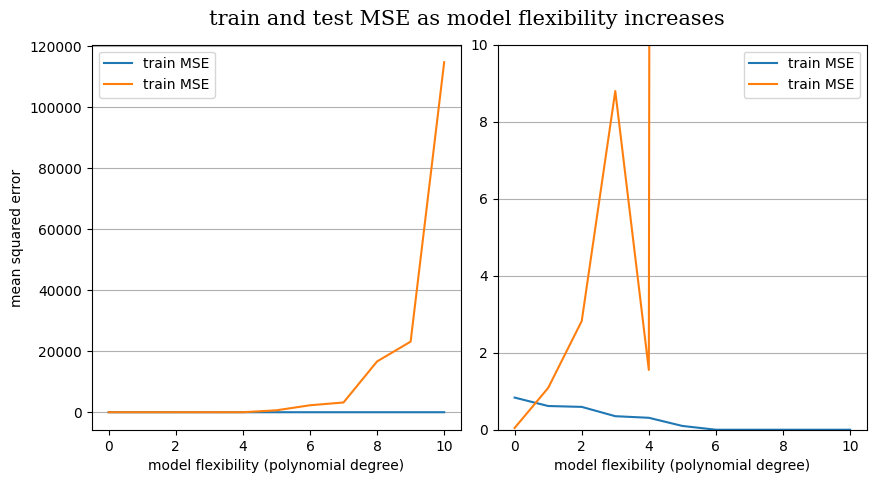

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=False, gridspec_kw={"hspace": 0.02, "wspace": 0.1})
(ax1, ax2) = axes
ax1.grid(axis="y", which="both"); ax2.grid(axis="y", which="both")

ax1.plot(np.arange(len(train_mse_list)), train_mse_list, label = "train MSE");
ax1.plot(np.arange(len(test_mse_list)), test_mse_list, label = "train MSE");
ax1.legend(loc="best");
###############################
###############################
###############################
ax2.plot(np.arange(len(train_mse_list)), train_mse_list, label = "train MSE");
ax2.plot(np.arange(len(test_mse_list)), test_mse_list, label = "train MSE");
ax2.legend(loc="best");
ax2.set_ylim(0, 10);


ax1.set_xlabel("model flexibility (polynomial degree)");
ax2.set_xlabel("model flexibility (polynomial degree)");
ax1.set_ylabel("mean squared error");

fig.suptitle(f"train and test MSE as model flexibility increases", y=0.95, 
             fontdict={"family": "serif"}, fontsize=15)
file_name = outdir + f"trainTestMSE.pdf"
plt.savefig(file_name, bbox_inches="tight", dpi=300)

In [34]:
train_df.shape

(8, 13)

In [35]:
test_df.shape

(2, 13)

In [36]:
###

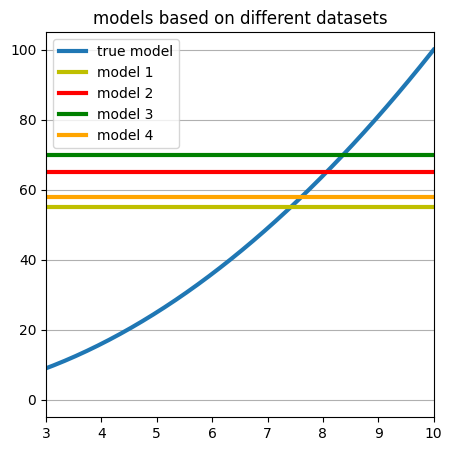

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False, gridspec_kw={"hspace": 0.02, "wspace": 0.1})
axes.grid(axis="y", which="both");


x = np.linspace(-10, 10, 400)
y = x ** 2

axes.plot(x, y, label = 'true model', lw=3);

axes.axhline(y=55, label="model 1", color="y", lw=3);
axes.axhline(y=65, label="model 2", color="r", lw=3);
axes.axhline(y=70, label="model 3", color="g", lw=3);
axes.axhline(y=58, label="model 4", color="orange", lw=3);

axes.legend(loc="best");
axes.set_xlim(3, 10);

plt.title('models based on different datasets');
file_name = outdir + f"crudeModelVariance.pdf"
plt.savefig(file_name, bbox_inches="tight", dpi=300)

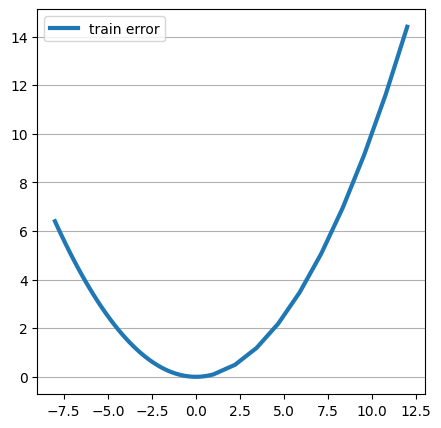

In [38]:
x_skewed = np.concatenate((np.linspace(-10, -1, 50), np.linspace(-1, 10, 10))) 
x_skewed.sort()
x_skewed = x_skewed+2
y_skewed = (x_skewed**2)/10


fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False, gridspec_kw={"hspace": 0.02, "wspace": 0.1})
axes.grid(axis="y", which="both");
axes.plot(x_skewed, y_skewed, label = 'train error', lw=3);
axes.legend(loc="best");

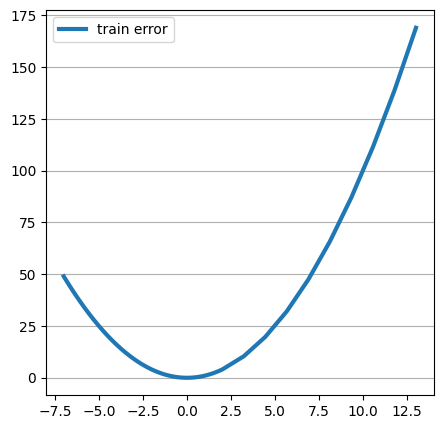

In [39]:
x_skewed = np.concatenate((np.linspace(-10, -1, 50), np.linspace(-1, 10, 10))) 
x_skewed.sort()
x_skewed = x_skewed + 3
y_skewed = (x_skewed**2)


fig, axes = plt.subplots(1, 1, figsize=(5, 5), sharey=False, gridspec_kw={"hspace": 0.02, "wspace": 0.1})
axes.grid(axis="y", which="both");
axes.plot(x_skewed, y_skewed, label = 'train error', lw=3);
axes.legend(loc="best");

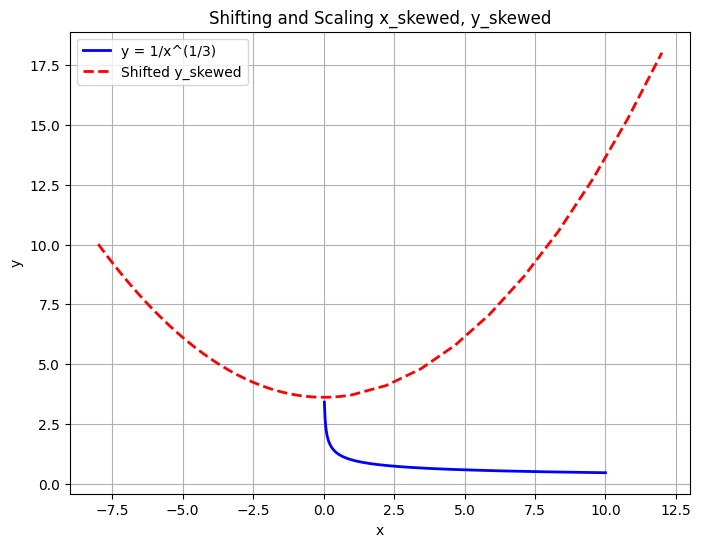

In [40]:
# Original x_skewed and y_skewed
x_skewed = np.concatenate((np.linspace(-10, -1, 50), np.linspace(-1, 10, 10))) 
x_skewed.sort()
x_skewed = x_skewed + 2
y_skewed = (x_skewed**2)/10

# x and y for the second plot
x = np.linspace(0, 10, 400)
y = 1 / x**(1/3)

x = x[1:]; y = y[1:]

# Shifting and scaling y_skewed so it's above the y plot
y_skewed_shifted = y_skewed + np.max(y) + 0.2  # Add a vertical offset

# Plotting the original x and y, and the shifted x_skewed and y_skewed
plt.figure(figsize=(8, 6))

# Plotting y vs x
plt.plot(x, y, label='y = 1/x^(1/3)', color='b', linewidth=2)

# Plotting the shifted y_skewed vs x_skewed
plt.plot(x_skewed, y_skewed_shifted, label='Shifted y_skewed', color='r', linestyle='--', linewidth=2)

# Labels and Title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Shifting and Scaling x_skewed, y_skewed')

# Show legend
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()

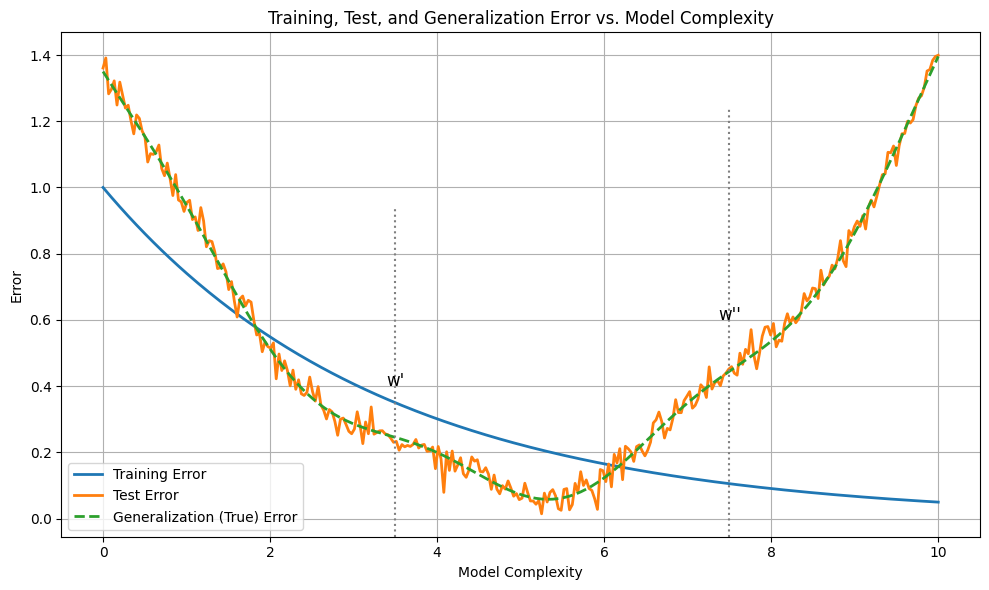

In [41]:
# X-axis: model complexity
x = np.linspace(0, 10, 300)

# Simulated training error: decreases monotonically
train_error = np.exp(-0.3 * x)

# Simulated generalization (true) error: U-shape + noise
true_error = 0.1 + 0.05 * (x - 5)**2 + 0.05 * np.sin(2 * x)

# Simulated test error: true error + noise
test_error = true_error + 0.03 * np.random.randn(len(x))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, train_error, label="Training Error", linewidth=2)
plt.plot(x, test_error, label="Test Error", linewidth=2)
plt.plot(x, true_error, label="Generalization (True) Error", linestyle='--', linewidth=2)

# Marking w' and w''
w1 = 3.5
w2 = 7.5
plt.axvline(w1, color='gray', linestyle=':', ymax=0.65)
plt.axvline(w2, color='gray', linestyle=':', ymax=0.85)
plt.text(w1, 0.4, "w'", ha='center', fontsize=12)
plt.text(w2, 0.6, "w''", ha='center', fontsize=12)

# Labels and styling
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.title("Training, Test, and Generalization Error vs. Model Complexity")

plt.tight_layout()
plt.show()

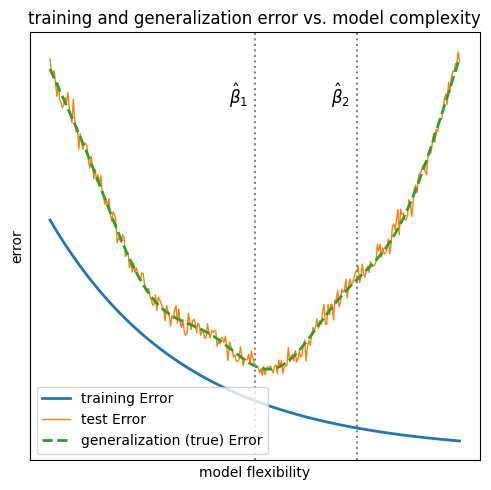

In [47]:
# X-axis: model complexity
x = np.linspace(0, 10, 300)

# Simulated training error: decreases monotonically
train_error = np.exp(-0.3 * x)

# Simulated generalization (true) error: U-shape + oscillation, shifted upward
true_error = 0.1 + 0.05 * (x - 5)**2 + 0.05 * np.sin(2 * x) + 0.3  # +0.3 ensures it's above training error
test_error = true_error + 0.03 * np.random.randn(len(x))

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(x, train_error, label="training Error", linewidth=2)
plt.plot(x, test_error, label="test Error", linewidth=1)
plt.plot(x, true_error, label="generalization (true) Error", linestyle='--', linewidth=2)


# Marking w' and w''
w1, w2 = 5, 7.5
plt.axvline(w1, color='gray', linestyle=':')
plt.axvline(w2, color='gray', linestyle=':')
plt.text(w1-.4, 1.5, r"$\hat \beta_1$", ha='center', fontsize=12)
plt.text(w2-.4, 1.5, r"$\hat \beta_2$", ha='center', fontsize=12)

# Labels and styling
plt.xlabel("model flexibility"); plt.ylabel("error");
plt.xticks([]); plt.yticks([]);

plt.legend(loc="lower left")
plt.grid(True)
plt.title("training and generalization error vs. model complexity")

plt.tight_layout()

file_name = outdir + f"GeneralizationOverFit.pdf"
plt.savefig(file_name, bbox_inches="tight", dpi=300)